In [1]:
import tensorflow as tf
from lib.utils import model ,preproc, newBuild, newGan
from keras.preprocessing.image import ImageDataGenerator

In [2]:
res = 128
channel = 3
# Preprocessing data with custom function
batch_size = 4
img_shape = (res,res,channel)
epochs = 2000
latent_dim = 100
n_images = 16
image_dir = "../../oDig/paint_faces/"
checkpoint_dir = "../../checkpoints/paint_faces_checkpoints/"
#data_loc = "../../datasets/celeb/"
image_freq = 500
s = tf.random.normal([n_images, latent_dim]),
checkpoint_freq = 500

2022-04-22 17:31:27.012379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 17:31:27.022211: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 17:31:27.022590: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-22 17:31:27.062086: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [3]:
datagen = ImageDataGenerator(rescale=1./255,
                             #vertical_flip=True,
                             horizontal_flip=True,
                             width_shift_range=0.3,
                             height_shift_range=0.3,
                             shear_range=0.3,
                             rotation_range=10,
                             fill_mode='nearest'

                             )
train_dir = '/home/sandor/Dev/final/finalproject/gan/datasets/port'

dataset = datagen.flow_from_directory(
     train_dir,
    target_size=(128, 128),
    batch_size=batch_size,
    class_mode=None
)

Found 462 images belonging to 1 classes.


In [4]:
constants = dict(
    num_conv_layers = 4,
    img_shape = img_shape,
    dim = 8,
    output = channel,
    latent_dim = latent_dim,
    kernel = 4,
    stride = 2
)
callback = dict(
    num_img = n_images,
    cFreq = checkpoint_freq,
    iFreq = image_freq,
    seed = s,
    loc = image_dir
)
gan_attributes = dict(
    check_location= checkpoint_dir,
    b_size=  batch_size,
    l_dim= latent_dim,
    data = dataset,
    epochs=epochs,
)

In [5]:
name = 'Model_1-Same-Sig-Batch-mDrop'
parameters = dict(
    model_name=name,
    filter_mode=3,
    gen_filter=7,
    disc_filter=6,
    is_batchnorm=True,
    is_multi_drop=True,
    is_tanh=False
)
model1 = model.ModelSettings(**constants, **parameters)
gan1 = newBuild.GANBuilder(atrib=model1, name=name, **gan_attributes)
g = newBuild.make_gan(gan1)

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense (Dense)               (None, 8192)              827392    
                                                                 
 batch_normalization_4 (Batc  (None, 8192)             32768     
 hNormalization)                                                 
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      262272    
 nspose)                                                 

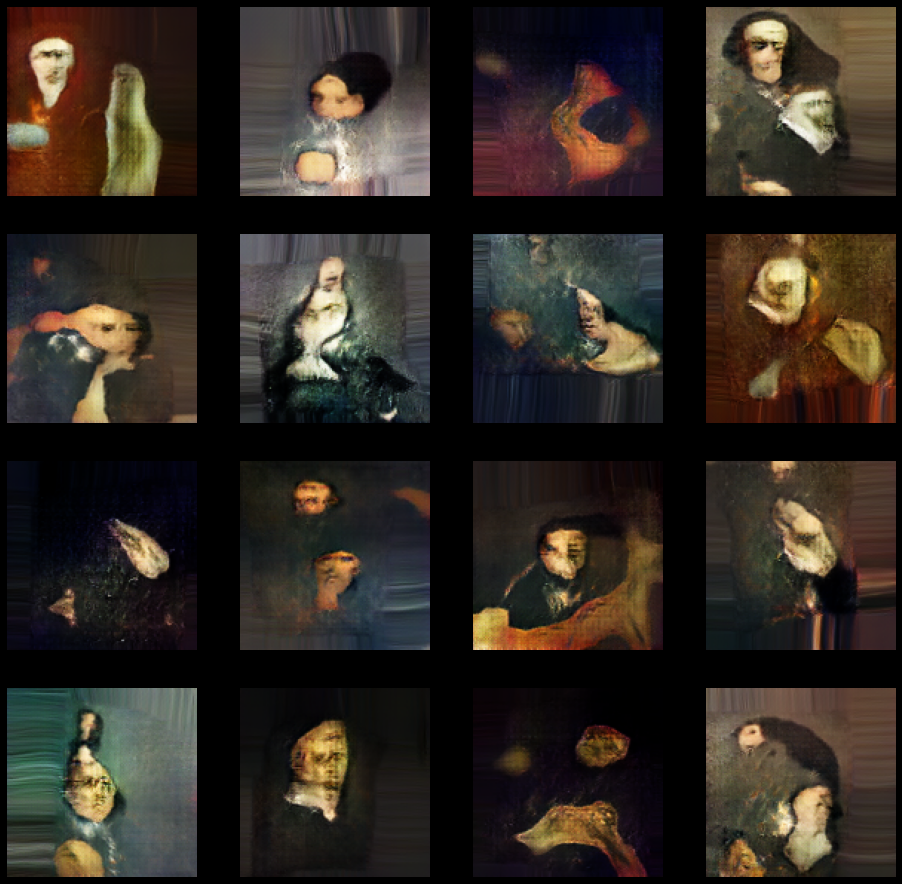

116/116 [==============================] - 9s 75ms/step - d_loss: 0.6090 - g_loss: 1.1380


In [6]:
g.fit(dataset, epochs=epochs, callbacks = [newGan.GANCallback(name= name,**callback)])